In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="8maps"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_8maps_2sE_dataset_pretokenize/output_8maps_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

HHHHHHH: 1763
DDDDDDDD: 1759
FFFFFFFFF: 1728
DDDDDDD: 1717
GGGGGGGGG: 1692
CCCCCCCCC: 1680
BBBBBBBBB: 1678
DDDDDDDDD: 1678
BBBBBBB: 1675
CCCCCCCC: 1671
HHHHHHHH: 1654
CCCCCCC: 1645
GGGGGGGG: 1645
EEEEEEEE: 1645
BBBBBBBB: 1642
FFFFFFFF: 1626
HHHHHHHHH: 1623
HHHHHH: 1618
AAAAAAAAAA: 1588
GGGGGGG: 1574
DDDDDD: 1560
EEEEEEEEE: 1547
AAAAAAAAA: 1542
FFFFFFF: 1521
BBBBBB: 1515
HH: 1500
CCCCCC: 1500
GGGGGGGGGG: 1499
BBBBBBBBBB: 1498
EEEEEEEEEE: 1492
DDDDDDDDDD: 1489
AAAEEE: 1488
FF: 1478
FFFFFFFFFF: 1453
BB: 1451
EEEEEEE: 1449
DD: 1446
EE: 1441
GG: 1441
CCCCCCCCCC: 1440
AAAAAAAA: 1418
AAAAAAAAAAA: 1417
GGGGGG: 1401
HHHHH: 1395
HHHHHHHHHH: 1391
CC: 1371
AA: 1364
AAADDD: 1324
AAACCC: 1297
GGGGGGGGGGG: 1291
FFFFFF: 1288
AAAAEEEE: 1287
CCCCCCCCCCC: 1286
DDDDDDDDDDD: 1278
FFFFFFFFFFF: 1276
EEEEEEEEEEE: 1275
FFFEEE: 1267
AAAAEEE: 1254
CCCCC: 1252
AAAAAAA: 1251
BBBBB: 1249
BBBBBBBBBBB: 1244
AAABBB: 1244
GGGDDD: 1227
DDDEEE: 1216
GGGEEE: 1216
AAAHHH: 1212
FFFHHH: 1209
AAAEEEE: 1205
EEEEEEEEEEEE: 1199


In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

69: 1763
43: 1759
78: 1728
66: 1717
73: 1692
74: 1680
76: 1678
77: 1678
68: 1675
41: 1671
45: 1654
65: 1645
39: 1645
38: 1645
42: 1642
44: 1626
80: 1623
61: 1618
81: 1588
64: 1574
57: 1560
71: 1547
72: 1542
67: 1521
59: 1515
21: 1500
60: 1500
86: 1499
89: 1498
82: 1492
85: 1489
100: 1488
20: 1478
87: 1453
19: 1451
63: 1449
18: 1446
15: 1441
16: 1441
90: 1440
33: 1418
91: 1417
56: 1401
53: 1395
93: 1391
17: 1371
14: 1364
106: 1324
103: 1297
95: 1291
58: 1288
130: 1287
98: 1286
99: 1278
102: 1276
94: 1275
108: 1267
126: 1254
52: 1252
62: 1251
51: 1249
97: 1244
114: 1244
119: 1227
112: 1216
117: 1216
122: 1212
123: 1209
134: 1205
104: 1199
50: 1195
118: 1188
101: 1187
109: 1187
29: 1184
40: 1182
107: 1178
137: 1162
110: 1158
121: 1148
34: 1147
105: 1137
129: 1135
113: 1129
125: 1122
131: 1117
145: 1116
149: 1113
120: 1105
136: 1102
36: 1102
111: 1097
133: 1096
138: 1081
153: 1078
152: 1077
48: 1071
116: 1062
143: 1062
157: 1056
55: 1053
154: 1048
169: 1043
155: 1042
147: 1039
170: 1036
14

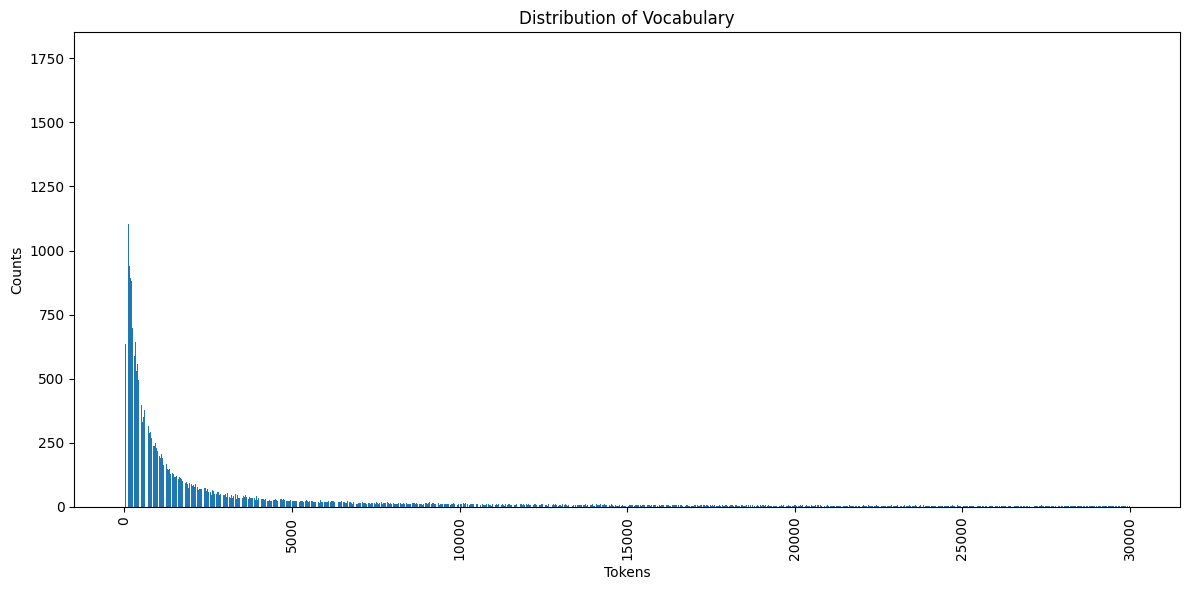

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


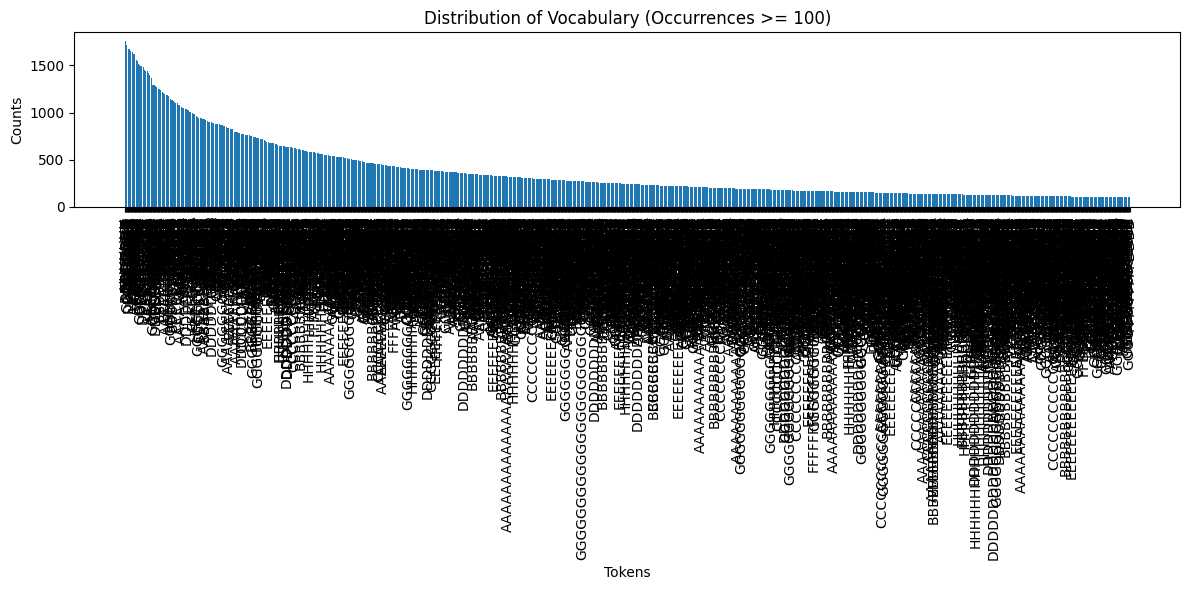

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 1744
vocab_count_decoded: 29054
recommended size vocab: 1836


In [18]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828